In [1]:
import requests
import certifi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data ref. https://covid-19.geohive.ie/datasets/d8eb52d56273413b84b0187a4e9117be_0/data

In [2]:
csvio = requests.get('https://opendata.arcgis.com/datasets/d8eb52d56273413b84b0187a4e9117be_0.csv', stream=True).raw
csvio.decode_content = True
df = pd.read_csv(csvio)

In [61]:
df['Date'] = pd.to_datetime(df['Date'])
week_of = df['Date'].iloc[::7]
week_of

0     2020-02-29 00:00:00+00:00
7     2020-03-09 00:00:00+00:00
14    2020-03-16 00:00:00+00:00
21    2020-03-23 00:00:00+00:00
28    2020-03-30 00:00:00+00:00
35    2020-04-06 00:00:00+00:00
42    2020-04-13 00:00:00+00:00
49    2020-04-20 00:00:00+00:00
56    2020-04-27 00:00:00+00:00
63    2020-05-04 00:00:00+00:00
70    2020-05-11 00:00:00+00:00
77    2020-05-18 00:00:00+00:00
84    2020-05-25 00:00:00+00:00
91    2020-06-01 00:00:00+00:00
98    2020-06-08 00:00:00+00:00
105   2020-06-15 00:00:00+00:00
112   2020-06-22 00:00:00+00:00
119   2020-06-29 00:00:00+00:00
126   2020-07-06 00:00:00+00:00
133   2020-07-13 00:00:00+00:00
140   2020-07-20 00:00:00+00:00
147   2020-07-27 00:00:00+00:00
154   2020-08-03 00:00:00+00:00
161   2020-08-10 00:00:00+00:00
168   2020-08-17 00:00:00+00:00
175   2020-08-24 00:00:00+00:00
182   2020-08-31 00:00:00+00:00
189   2020-09-07 00:00:00+00:00
196   2020-09-14 00:00:00+00:00
203   2020-09-21 00:00:00+00:00
210   2020-09-28 00:00:00+00:00
217   20

In [62]:
df['deaths_ma'] = df['ConfirmedCovidDeaths'].rolling(7, min_periods=1).mean()
deaths_weekly = df['deaths_ma'].iloc[::7]
deaths_weekly
#df['deaths_ema'] = df['ConfirmedCovidDeaths'].ewm(halflife=2).mean().rolling(7, min_periods=1).mean()

0       0.000000
7       0.000000
14      0.285714
21      0.571429
28      6.857143
35     17.142857
42     27.428571
49     46.142857
56     34.857143
63     32.428571
70     23.000000
77     12.714286
84      9.571429
91      7.571429
98      5.285714
105     4.428571
112     2.285714
119     2.857143
126     1.714286
133     1.428571
140     1.142857
147     1.571429
154     0.142857
161     1.428571
168     0.285714
175     0.857143
182     0.000000
189     0.142857
196     1.142857
203     1.428571
210     1.428571
217     2.428571
224     2.571429
231     3.571429
238     4.714286
245     4.571429
252     4.571429
259     5.428571
266     5.714286
273     4.571429
280     6.857143
287     4.285714
294     4.571429
Name: deaths_ma, dtype: float64

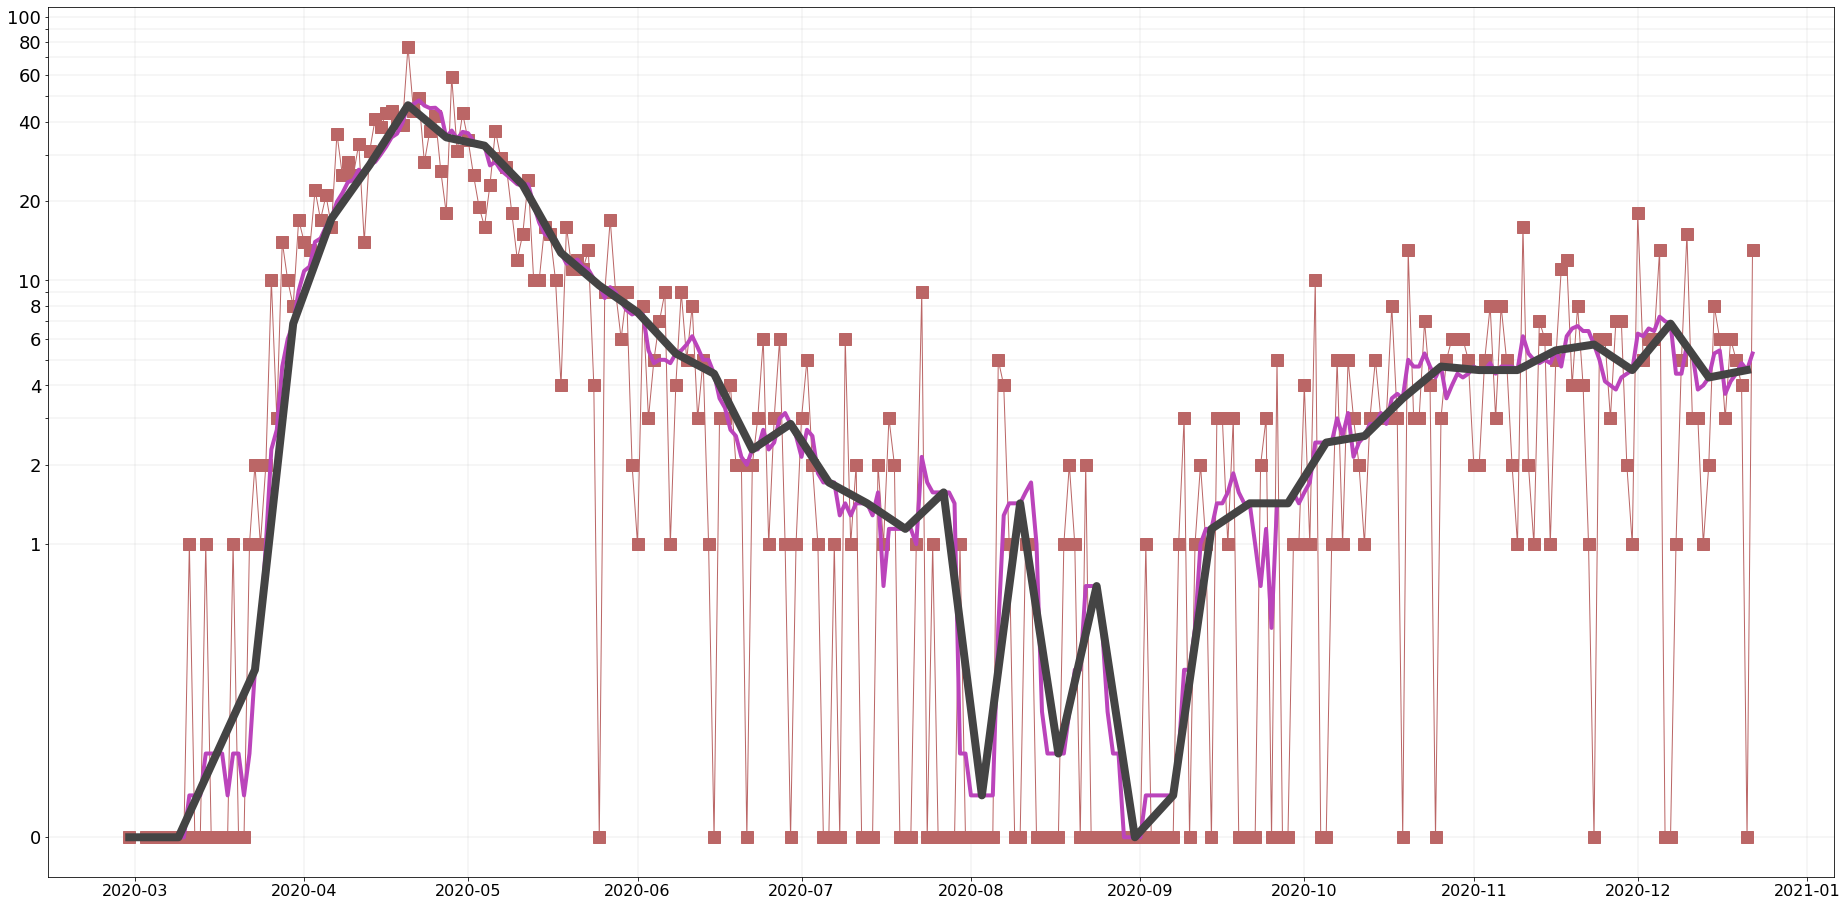

In [65]:
plt.figure(figsize=[32,16])
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=18)
plt.yscale('symlog', linthresh=1)
ticks  = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100)
labels = (0, 1, 2,'', 4,'', 6,'', 8,'', 10, 20, '', 40, '', 60, '', 80, '', 100)
plt.yticks(ticks=ticks, labels=labels)
plt.grid(True, linewidth=0.2)

plt.plot(df['Date'], df['ConfirmedCovidDeaths'], '-s', color="#bb6666", linewidth=1, markersize=12)
plt.plot(df['Date'], df['deaths_ma'], '-', color="#bb44bb",  linewidth=4)
plt.plot(week_of, deaths_weekly, '-', color="#444444",  linewidth=8)